In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
# Film/series base information
netflix21 = pd.read_excel("Netflix Dataset Latest 2021.xlsx")
netflix_22 = pd.read_csv("titles.csv", 
                names = ['ID', 'Title', 'Series or Movie', 'Description', 'Release Date',
                           'Age Certification', 'Runtime', 'Genre', 'Production Countries',
                           'Seasons', 'IMDb ID', 'IMDb Score', 'IMDb Votes', 'TMDb Popularity',
                           'TMDb Score'], header=1)

# Top 10 per countries, global, and all the time
countries = pd.read_excel("all-weeks-countries.xlsx")
all_global = pd.read_excel("all-weeks-global.xlsx")
most = pd.read_excel("most-popular.xlsx")

# Continents 
continents = pd.read_csv("countryContinent.csv", encoding='latin1')

In [3]:
print(netflix21.shape)
print(netflix_22.shape)
print(countries.shape)
print(all_global.shape)
print(most.shape)
print(continents.shape)

(9425, 29)
(5849, 15)
(125320, 8)
(2680, 7)
(40, 5)
(249, 9)


In [4]:
print(netflix21.shape)
print(netflix21.columns)
display(netflix21.head(1))

(9425, 29)
Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')


,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,98.0,82.0,74.0,57.0,2122065.0,2008-12-12,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube


In [5]:
print(netflix_22.shape)
print(netflix_22.columns)
display(netflix_22.head(1))

(5849, 15)
Index(['ID', 'Title', 'Series or Movie', 'Description', 'Release Date',
       'Age Certification', 'Runtime', 'Genre', 'Production Countries',
       'Seasons', 'IMDb ID', 'IMDb Score', 'IMDb Votes', 'TMDb Popularity',
       'TMDb Score'],
      dtype='object')


,ID,Title,Series or Movie,Description,Release Date,Age Certification,Runtime,Genre,Production Countries,Seasons,IMDb ID,IMDb Score,IMDb Votes,TMDb Popularity,TMDb Score
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179


In [6]:
print(countries.shape)
print(countries.columns)
display(countries.head(1))

(125320, 8)
Index(['country_name', 'country_iso2', 'week', 'category', 'weekly_rank',
       'show_title', 'season_title', 'cumulative_weeks_in_top_10'],
      dtype='object')


,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-10-09,Films,1,Mr. Harrigan's Phone,NaN,1


In [7]:
print(all_global.shape)
print(all_global.columns)
display(all_global.head(1))

(2680, 7)
Index(['week', 'category', 'weekly_rank', 'show_title', 'season_title',
       'weekly_hours_viewed', 'cumulative_weeks_in_top_10'],
      dtype='object')


,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-10-09,Films (English),1,Luckiest Girl Alive,NaN,43080000,1


In [8]:
print(most.shape)
print(most.columns)
display(most.head(1))

(40, 5)
Index(['category', 'rank', 'show_title', 'season_title',
       'hours_viewed_first_28_days'],
      dtype='object')


,category,rank,show_title,season_title,hours_viewed_first_28_days
0,Films (English),1,Red Notice,NaN,364020000


In [9]:
print(continents.shape)
print(continents.columns)
display(continents.head(1))

(249, 9)
Index(['country', 'code_2', 'code_3', 'country_code', 'iso_3166_2',
       'continent', 'sub_region', 'region_code', 'sub_region_code'],
      dtype='object')


,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0


## Data Preparation

### Merge 2 netflix database

In [10]:
# Preprocess for netflix 2022
netflix_22['Title'] = netflix_22['Title'].astype(str)
netflix_22 = netflix_22.sort_values('Title')

# Drop duplicate title
netflix_22 = netflix_22.drop_duplicates(keep='first', subset=['Title'])

# Change genre
netflix_22['Genre'] = netflix_22['Genre'].str.replace('[','')
netflix_22['Genre'] = netflix_22['Genre'].str.replace(']','')
netflix_22['Genre'] = netflix_22['Genre'].str.replace(r"[\"\']", '')
netflix_22 = netflix_22.replace(r'^\s*$', np.nan, regex=True)
netflix_22['Genre'] = netflix_22['Genre'].str.title()

# Set type for series or movie column
netflix_22['Series or Movie'] = netflix_22['Series or Movie'].str.title()
netflix_22['Series or Movie'] = netflix_22['Series or Movie'].str.replace('Show','Series')

# Set runtime into categorical (belom solve)
# conditions  = [ netflix_22['Runtime'] < 30, 
#                ((netflix_22['Runtime'] >= 30) & (netflix_22['Runtime'] < 60)), 
#                ((netflix_22['Runtime'] >= 60 & netflix_22['Runtime'] < 120)), 
#                 netflix_22['Runtime'] >= 120]
# choices     = [ '< 30 minutes', '30-60 mins', '1-2 hour', '> 2 hrs' ]
    
# netflix_22['Runtime'] = np.select(conditions, choices, default=np.nan)

# netflix_22['Runtime'] = np.where(netflix_22['Runtime'] < 30, '< 30 minutes', 
#                                     np.where((netflix_22['Runtime'] >= 30) and (netflix_22['Runtime'] < 60), '30-60 mins', 
#                                             np.where((netflix_22['Runtime'] >= 60 and netflix_22['Runtime'] < 120), '1-2 hour', 
#                                                     np.where(netflix_22['Runtime'] > 120, '> 2 hrs', np.nan))))

# Merge 2 netflix DB
netflix = pd.concat([netflix21, netflix_22])

### Genre

In [11]:
# Preprocess for similar name
netflix['Genre'] = netflix['Genre'].str.replace('Documentation','Documentary')
netflix['Genre'] = netflix['Genre'].str.replace('Musical','Music')
netflix['Genre'] = netflix['Genre'].str.replace('Reality-TV','Reality')
netflix['Genre'] = netflix['Genre'].str.replace('Scifi','Sci-Fi')

In [12]:
netflix['Genre']
all_genre = set()
for row in netflix['Genre']:
    str_genre = str(row).split(", ")
    for genre in str_genre:
        if genre != None:
            all_genre.add(genre)

In [13]:
all_genre

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'European',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'News',
 'Reality',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western',
 'nan'}

In [14]:
arr_genre = list(all_genre)
for value in arr_genre:
    netflix[value] = netflix.apply(lambda row: pd.notnull(row['Genre']) and value in row['Genre'].split(','), axis=1)

### Continents

In [34]:
continents = continents.replace('Bolivia (Plurinational State of)', 'Bolivia')
continents = continents.replace('Russian Federation', 'Russia')
continents = continents.replace('Korea (Republic of)', 'South Korea')
continents = continents.replace('Taiwan, Province of China', 'Taiwan')
continents = continents.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
continents = continents.replace('United States of America', 'United States')
continents = continents.replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
continents = continents.replace('Viet Nam', 'Vietnam')

### Languages

In [15]:
netflix['Languages']
all_languages = set()
for row in netflix['Languages']:
    str_languages = str(row).split(", ")
    for language in str_languages:
        if language != None:
            all_languages.add(language)

In [16]:
all_languages

{' Ancient (to 1453)',
 ' Old',
 'Aboriginal',
 'Acholi',
 'Afrikaans',
 'Akan',
 'Albanian',
 'Algonquin',
 'American Sign Language',
 'Amharic',
 'Apache languages',
 'Arabic',
 'Aragonese',
 'Aramaic',
 'Armenian',
 'Assamese',
 'Awadhi',
 'Azerbaijani',
 'Bable',
 'Basque',
 'Belarusian',
 'Bengali',
 'Berber languages',
 'Bhojpuri',
 'Bosnian',
 'Brazilian Sign Language',
 'Breton',
 'Bulgarian',
 'Burmese',
 'Cantonese',
 'Catalan',
 'Central American Indian languages',
 'Chechen',
 'Cheyenne',
 'Chinese',
 'Cornish',
 'Cree',
 'Croatian',
 'Czech',
 'Danish',
 'Dari',
 'Dinka',
 'Dutch',
 'East-Greenlandic',
 'Egyptian (Ancient)',
 'English',
 'Esperanto',
 'Estonian',
 'Filipino',
 'Finnish',
 'Flemish',
 'French',
 'French Sign Language',
 'Fulah',
 'Gallegan',
 'Georgian',
 'German',
 'Greek',
 'Greenlandic',
 'Gujarati',
 'Haitian',
 'Hakka',
 'Hausa',
 'Hawaiian',
 'Hebrew',
 'Hindi',
 'Hmong',
 'Hokkien',
 'Hungarian',
 'Ibo',
 'Icelandic',
 'Indonesian',
 'Inuktitut',
 'I

In [17]:
arr_languages = list(all_languages)
for value in arr_languages:
    netflix[value] = netflix.apply(lambda row: pd.notnull(row['Languages']) and value in row['Languages'].split(','), axis=1)

### Actors

In [18]:
netflix['Actors']
all_actors = set()
for row in netflix['Actors']:
    str_actor = str(row).split(", ")
    for actor in str_actor:
        if actor != None:
            all_actors.add(actor)

In [19]:
all_actors

{"Nils d'Aulaire",
 'Jenna Elfman',
 'David Bierend',
 'Christine Marie Cabanos',
 'Simon Lipkin',
 'Aoi Morikawa',
 'Beccy Henderson',
 'Kate Chastain',
 'Takahiro Mizushima',
 'Clarissa Pinheiro',
 'Aldo Giuffrè',
 'Tzi Ma',
 'Andrew Steel',
 'Liam Aiken',
 'Bent Mejding',
 'George Voskovec',
 'Hugh Jackman',
 'Cariba Heine',
 'Brett Gelman',
 'Phoebe Yuan',
 'Louise Nyvall',
 'Sarah Drew',
 'Muhammed Akay',
 'Hazar Ergüçlü',
 'Yuka Nanri',
 'Pooja Hegde',
 'Hirofumi Nojima',
 'Sarah Paulson',
 'Jon Kortajarena',
 'Kürsat Alniaçik',
 'Alice Lowe',
 'Donald Sutherland',
 'Focus Jirakul',
 'Matthias Schweighöfer',
 'Emily Emmersen',
 'Dónal Finn',
 'Patricia Tallman',
 'Pete Postlethwaite',
 'Zandra Andersson',
 'Steve Hicks',
 'Claudia Gerini',
 'Molly McCann',
 'Clark Sarullo',
 'Christian Malheiros',
 'Michael Campion',
 'Emmanuelle Béart',
 'Yôichi Nukumizu',
 'Guy Marchand',
 'Mohit Raina',
 'Elle Alexander',
 "De'aundre Bonds",
 'Tomer Capon',
 "Éleonore 'Lele' Senlis",
 'Manu Jo

In [20]:
# It's too much work :) No need
# arr_actors = list(all_actors)
# for value in arr_actors:
#     netflix[value] = netflix.apply(lambda row: pd.notnull(row['Actors']) and value in row['Actors'].split(','), axis=1)

In [21]:
netflix.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,ID,Description,Age Certification,Production Countries,Seasons,IMDb ID,TMDb Popularity,TMDb Score,Thriller,Mystery,Reality,Fantasy,Sport,European,Western,Biography,Sci-Fi,Family,Romance,News,Horror,Drama,History,Music,nan,Documentary,Crime,Comedy,Game-Show,Adult,Short,Film-Noir,Action,War,Animation,Adventure,Talk-Show,Polish,Scanian,Basque,Akan,Ancient (to 1453),Nahuatl,Slovak,Dutch,Malay,French Sign Language,Georgian,Dinka,Mende,Manipuri,Hindi,Tatar,Aboriginal,Afrikaans,Min Nan,Serbian,Hokkien,Estonian,Marathi,Dari,Kriolu,Haitian,Cornish,Maltese,Filipino,Old English,Occitan,Gujarati,Japanese Sign Language,Sindarin,Turkmen,Inuktitut,Central American Indian languages,Slovenian,Sioux,Lingala,Sinhalese,Mixtec,Kannada,Romanian,Acholi,Southern Sotho,Telugu,Saami,Albanian,Hungarian,Neapolitan,Amharic,Welsh,Awadhi,Russian,Punjabi,Nyanja,Spanish,Kinyarwanda,Apache languages,Lithuanian,Maya,Aramaic,Arabic,French,Yiddish,Kazakh,Tswana,Scots,Swiss German,Wayuu,Korean Sign Language,Somali,Swahili,Egyptian (Ancient),Breton,Quenya,Nepali,Sign Languages,Tarahumara,Malayalam,Tupi,Shanghainese,Ibo,Romany,German,Hawaiian,East-Greenlandic,Greenlandic,Persian,Zulu,Irish,Bhojpuri,Danish,Assamese,Scottish Gaelic,Thai,Greek,Spanish Sign Language,Flemish,Lao,Burmese,Nama,Old,Syriac,Croatian,Norwegian,Belarusian,Sicilian,Navajo,Polynesian,Tajik,Aragonese,Xhosa,Pawnee,American Sign Language,Portuguese,Finnish,Japanese,Algonquin,Cree,Tamil,Sranan,Fulah,Hakka,Swedish,Tulu,Mandarin,Bengali,Malinka,Klingon,Latin,None,Hausa,Vietnamese,Uzbek,Azerbaijani,Italian,Ukrainian,Tagalog,Hebrew,English,Quechua,Indonesian,Khmer,Chinese,Papiamento,Mohawk,Pushto,Mapudungun,Korean,Esperanto,Cheyenne,Tibetan,Icelandic,Kikuyu,Brazilian Sign Language,Shoshoni,Bable,North American Indian,Bulgarian,Cantonese,Catalan,Yoruba,Bosnian,Serbo-Croatian,Latvian,Kurdish,Turkish,Sanskrit,Czech,Urdu,Tok Pisin,Mongolian,Berber languages,Norse,Uighur,Luxembourgish,Chechen,Gallegan,Maori,Wolof,Armenian,Hmong
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,98.0,82.0,74.0,57.0,2122065.0,2008-12-12 00:00:00,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False

In [22]:
netflix

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,ID,Description,Age Certification,Production Countries,Seasons,IMDb ID,TMDb Popularity,TMDb Score,Thriller,Mystery,Reality,Fantasy,Sport,European,Western,Biography,Sci-Fi,Family,Romance,News,Horror,Drama,History,Music,nan,Documentary,Crime,Comedy,Game-Show,Adult,Short,Film-Noir,Action,War,Animation,Adventure,Talk-Show,Polish,Scanian,Basque,Akan,Ancient (to 1453),Nahuatl,Slovak,Dutch,Malay,French Sign Language,Georgian,Dinka,Mende,Manipuri,Hindi,Tatar,Aboriginal,Afrikaans,Min Nan,Serbian,Hokkien,Estonian,Marathi,Dari,Kriolu,Haitian,Cornish,Maltese,Filipino,Old English,Occitan,Gujarati,Japanese Sign Language,Sindarin,Turkmen,Inuktitut,Central American Indian languages,Slovenian,Sioux,Lingala,Sinhalese,Mixtec,Kannada,Romanian,Acholi,Southern Sotho,Telugu,Saami,Albanian,Hungarian,Neapolitan,Amharic,Welsh,Awadhi,Russian,Punjabi,Nyanja,Spanish,Kinyarwanda,Apache languages,Lithuanian,Maya,Aramaic,Arabic,French,Yiddish,Kazakh,Tswana,Scots,Swiss German,Wayuu,Korean Sign Language,Somali,Swahili,Egyptian (Ancient),Breton,Quenya,Nepali,Sign Languages,Tarahumara,Malayalam,Tupi,Shanghainese,Ibo,Romany,German,Hawaiian,East-Greenlandic,Greenlandic,Persian,Zulu,Irish,Bhojpuri,Danish,Assamese,Scottish Gaelic,Thai,Greek,Spanish Sign Language,Flemish,Lao,Burmese,Nama,Old,Syriac,Croatian,Norwegian,Belarusian,Sicilian,Navajo,Polynesian,Tajik,Aragonese,Xhosa,Pawnee,American Sign Language,Portuguese,Finnish,Japanese,Algonquin,Cree,Tamil,Sranan,Fulah,Hakka,Swedish,Tulu,Mandarin,Bengali,Malinka,Klingon,Latin,None,Hausa,Vietnamese,Uzbek,Azerbaijani,Italian,Ukrainian,Tagalog,Hebrew,English,Quechua,Indonesian,Khmer,Chinese,Papiamento,Mohawk,Pushto,Mapudungun,Korean,Esperanto,Cheyenne,Tibetan,Icelandic,Kikuyu,Brazilian Sign Language,Shoshoni,Bable,North American Indian,Bulgarian,Cantonese,Catalan,Yoruba,Bosnian,Serbo-Croatian,Latvian,Kurdish,Turkish,Sanskrit,Czech,Urdu,Tok Pisin,Mongolian,Berber languages,Norse,Uighur,Luxembourgish,Chechen,Gallegan,Maori,Wolof,Armenian,Hmong
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,98.0,82.0,74.0,57.0,2122065.0,2008-12-12 00:00:00,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False

In [35]:
join_countries = countries.merge(netflix, right_on="Title", left_on="show_title", how="left")
join_countries = join_countries.merge(continents, left_on="country_name", right_on="country", how="left")

In [36]:
join_countries

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,ID,Description,Age Certification,Production Countries,Seasons,IMDb ID,TMDb Popularity,TMDb Score,Thriller,Mystery,Reality,Fantasy,Sport,European,Western,Biography,Sci-Fi,Family,Romance,News,Horror,Drama,History,Music,nan,Documentary,Crime,Comedy,Game-Show,Adult,Short,Film-Noir,Action,War,Animation,Adventure,Talk-Show,Polish,Scanian,Basque,Akan,Ancient (to 1453),Nahuatl,Slovak,Dutch,Malay,French Sign Language,Georgian,Dinka,Mende,Manipuri,Hindi,Tatar,Aboriginal,Afrikaans,Min Nan,Serbian,Hokkien,Estonian,Marathi,Dari,Kriolu,Haitian,Cornish,Maltese,Filipino,Old English,Occitan,Gujarati,Japanese Sign Language,Sindarin,Turkmen,Inuktitut,Central American Indian languages,Slovenian,Sioux,Lingala,Sinhalese,Mixtec,Kannada,Romanian,Acholi,Southern Sotho,Telugu,Saami,Albanian,Hungarian,Neapolitan,Amharic,Welsh,Awadhi,Russian,Punjabi,Nyanja,Spanish,Kinyarwanda,Apache languages,Lithuanian,Maya,Aramaic,Arabic,French,Yiddish,Kazakh,Tswana,Scots,Swiss German,Wayuu,Korean Sign Language,Somali,Swahili,Egyptian (Ancient),Breton,Quenya,Nepali,Sign Languages,Tarahumara,Malayalam,Tupi,Shanghainese,Ibo,Romany,German,Hawaiian,East-Greenlandic,Greenlandic,Persian,Zulu,Irish,Bhojpuri,Danish,Assamese,Scottish Gaelic,Thai,Greek,Spanish Sign Language,Flemish,Lao,Burmese,Nama,Old,Syriac,Croatian,Norwegian,Belarusian,Sicilian,Navajo,Polynesian,Tajik,Aragonese,Xhosa,Pawnee,American Sign Language,Portuguese,Finnish,Japanese,Algonquin,Cree,Tamil,Sranan,Fulah,Hakka,Swedish,Tulu,Mandarin,Bengali,Malinka,Klingon,Latin,None,Hausa,Vietnamese,Uzbek,Azerbaijani,Italian,Ukrainian,Tagalog,Hebrew,English,Quechua,Indonesian,Khmer,Chinese,Papiamento,Mohawk,Pushto,Mapudungun,Korean,Esperanto,Cheyenne,Tibetan,Icelandic,Kikuyu,Brazilian Sign Language,Shoshoni,Bable,North American Indian,Bulgarian,Cantonese,Catalan,Yoruba,Bosnian,Serbo-Croatian,Latvian,Kurdish,Turkish,Sanskrit,Czech,Urdu,Tok Pisin,Mongolian,Berber languages,Norse,Uighur,Luxembourgish,Chechen,Gallegan,Maori,Wolof,Armenian,Hmong,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Argentina,AR,2022-10-09,Films,1,Mr. Harrigan's Phone,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,AR,ARG,32,ISO 3166-2:AR,Americas,South America,19.0,5.0
1,Argentina,AR,2022-10-09,Films,2,Luckiest Girl Alive,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [25]:
join_global = all_global.merge(netflix, right_on="Title", left_on="show_title", how="left")

In [26]:
join_global

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,ID,Description,Age Certification,Production Countries,Seasons,IMDb ID,TMDb Popularity,TMDb Score,Thriller,Mystery,Reality,Fantasy,Sport,European,Western,Biography,Sci-Fi,Family,Romance,News,Horror,Drama,History,Music,nan,Documentary,Crime,Comedy,Game-Show,Adult,Short,Film-Noir,Action,War,Animation,Adventure,Talk-Show,Polish,Scanian,Basque,Akan,Ancient (to 1453),Nahuatl,Slovak,Dutch,Malay,French Sign Language,Georgian,Dinka,Mende,Manipuri,Hindi,Tatar,Aboriginal,Afrikaans,Min Nan,Serbian,Hokkien,Estonian,Marathi,Dari,Kriolu,Haitian,Cornish,Maltese,Filipino,Old English,Occitan,Gujarati,Japanese Sign Language,Sindarin,Turkmen,Inuktitut,Central American Indian languages,Slovenian,Sioux,Lingala,Sinhalese,Mixtec,Kannada,Romanian,Acholi,Southern Sotho,Telugu,Saami,Albanian,Hungarian,Neapolitan,Amharic,Welsh,Awadhi,Russian,Punjabi,Nyanja,Spanish,Kinyarwanda,Apache languages,Lithuanian,Maya,Aramaic,Arabic,French,Yiddish,Kazakh,Tswana,Scots,Swiss German,Wayuu,Korean Sign Language,Somali,Swahili,Egyptian (Ancient),Breton,Quenya,Nepali,Sign Languages,Tarahumara,Malayalam,Tupi,Shanghainese,Ibo,Romany,German,Hawaiian,East-Greenlandic,Greenlandic,Persian,Zulu,Irish,Bhojpuri,Danish,Assamese,Scottish Gaelic,Thai,Greek,Spanish Sign Language,Flemish,Lao,Burmese,Nama,Old,Syriac,Croatian,Norwegian,Belarusian,Sicilian,Navajo,Polynesian,Tajik,Aragonese,Xhosa,Pawnee,American Sign Language,Portuguese,Finnish,Japanese,Algonquin,Cree,Tamil,Sranan,Fulah,Hakka,Swedish,Tulu,Mandarin,Bengali,Malinka,Klingon,Latin,None,Hausa,Vietnamese,Uzbek,Azerbaijani,Italian,Ukrainian,Tagalog,Hebrew,English,Quechua,Indonesian,Khmer,Chinese,Papiamento,Mohawk,Pushto,Mapudungun,Korean,Esperanto,Cheyenne,Tibetan,Icelandic,Kikuyu,Brazilian Sign Language,Shoshoni,Bable,North American Indian,Bulgarian,Cantonese,Catalan,Yoruba,Bosnian,Serbo-Croatian,Latvian,Kurdish,Turkish,Sanskrit,Czech,Urdu,Tok Pisin,Mongolian,Berber languages,Norse,Uighur,Luxembourgish,Chechen,Gallegan,Maori,Wolof,Armenian,Hmong
0,2022-10-09,Films (English),1,Luckiest Girl Alive,NaN,43080000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-09,Films (English),2,Mr. Harrigan's Phone,NaN,35420000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [27]:
join_most = most.merge(netflix, left_on="show_title", right_on="Title", how="left")

In [28]:
join_most

,category,rank,show_title,season_title,hours_viewed_first_28_days,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,ID,Description,Age Certification,Production Countries,Seasons,IMDb ID,TMDb Popularity,TMDb Score,Thriller,Mystery,Reality,Fantasy,Sport,European,Western,Biography,Sci-Fi,Family,Romance,News,Horror,Drama,History,Music,nan,Documentary,Crime,Comedy,Game-Show,Adult,Short,Film-Noir,Action,War,Animation,Adventure,Talk-Show,Polish,Scanian,Basque,Akan,Ancient (to 1453),Nahuatl,Slovak,Dutch,Malay,French Sign Language,Georgian,Dinka,Mende,Manipuri,Hindi,Tatar,Aboriginal,Afrikaans,Min Nan,Serbian,Hokkien,Estonian,Marathi,Dari,Kriolu,Haitian,Cornish,Maltese,Filipino,Old English,Occitan,Gujarati,Japanese Sign Language,Sindarin,Turkmen,Inuktitut,Central American Indian languages,Slovenian,Sioux,Lingala,Sinhalese,Mixtec,Kannada,Romanian,Acholi,Southern Sotho,Telugu,Saami,Albanian,Hungarian,Neapolitan,Amharic,Welsh,Awadhi,Russian,Punjabi,Nyanja,Spanish,Kinyarwanda,Apache languages,Lithuanian,Maya,Aramaic,Arabic,French,Yiddish,Kazakh,Tswana,Scots,Swiss German,Wayuu,Korean Sign Language,Somali,Swahili,Egyptian (Ancient),Breton,Quenya,Nepali,Sign Languages,Tarahumara,Malayalam,Tupi,Shanghainese,Ibo,Romany,German,Hawaiian,East-Greenlandic,Greenlandic,Persian,Zulu,Irish,Bhojpuri,Danish,Assamese,Scottish Gaelic,Thai,Greek,Spanish Sign Language,Flemish,Lao,Burmese,Nama,Old,Syriac,Croatian,Norwegian,Belarusian,Sicilian,Navajo,Polynesian,Tajik,Aragonese,Xhosa,Pawnee,American Sign Language,Portuguese,Finnish,Japanese,Algonquin,Cree,Tamil,Sranan,Fulah,Hakka,Swedish,Tulu,Mandarin,Bengali,Malinka,Klingon,Latin,None,Hausa,Vietnamese,Uzbek,Azerbaijani,Italian,Ukrainian,Tagalog,Hebrew,English,Quechua,Indonesian,Khmer,Chinese,Papiamento,Mohawk,Pushto,Mapudungun,Korean,Esperanto,Cheyenne,Tibetan,Icelandic,Kikuyu,Brazilian Sign Language,Shoshoni,Bable,North American Indian,Bulgarian,Cantonese,Catalan,Yoruba,Bosnian,Serbo-Croatian,Latvian,Kurdish,Turkish,Sanskrit,Czech,Urdu,Tok Pisin,Mongolian,Berber languages,Norse,Uighur,Luxembourgish,Chechen,Gallegan,Maori,Wolof,Armenian,Hmong
0,Films (English),1,Red Notice,NaN,364020000,Red Notice,"Thriller, Action, Comedy, Crime",NaN,NaN,Movie,NaN,NaN,117,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,NaN,2021,NaT,NaN,NaN,NaN,NaN,264194.0,NaN,NaN,NaN,NaN,tm404856,An Interpol-issued Red Notice is a global aler...,PG-13,['US'],NaN,tt7991608,311.673,6.775,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Films (English),2

In [29]:
netflix['Director'].value_counts()

Steven Spielberg     28
Woody Allen          18
Ridley Scott         17
Steven Soderbergh    16
Pedro Almodóvar      16
                     ..
Mike Wiluan           1
Chris Nelson          1
Siew Hua Yeo          1
Hasan Karacadag       1
Amos Gitai            1
Name: Director, Length: 4252, dtype: int64

In [30]:
netflix.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer',
       ...
       'Berber languages', 'Norse', 'Uighur', 'Luxembourgish', 'Chechen',
       'Gallegan', 'Maori', 'Wolof', 'Armenian', 'Hmong'],
      dtype='object', length=250)

In [31]:
# Jumlah film yang dimainkan tiap actor
actors = {}

for row in netflix['Actors']:
    str_actors = str(row).split(", ")
    for s in str_actors:
        if s in actors:
            actors[s] += 1
        else:
            actors[s] = 1

In [32]:
actors

{'Lina Leandersson': 3,
 'Kåre Hedebrant': 3,
 'Per Ragnar': 3,
 'Henrik Dahl': 3,
 'Cleo': 2,
 'Paddy Considine': 6,
 'Beanie Feldstein': 2,
 'Dónal Finn': 1,
 'Kathaleeya McIntosh': 1,
 'Nadech Kugimiya': 1,
 'Pimchanok Leuwisetpaiboon': 1,
 'Thiti Mahayotaruk': 4,
 'Katarzyna Maciag': 1,
 'Piotr Nowak': 1,
 'Marcin Dorocinski': 1,
 'Julia Kijowska': 2,
 'Hugo Björne': 1,
 'Eva Dahlbeck': 1,
 'Ulf Palme': 1,
 'Ragnar Falck': 1,
 'Lasse Åberg': 1,
 'Cecilia Walton': 1,
 'Eva Millberg': 1,
 'Jon Skolmen': 1,
 'Marcia Gay Harden': 5,
 'Margarita Levieva': 2,
 'Chris Marquette': 1,
 'Justin Chatwin': 3,
 'Maria Johansson': 1,
 'Hans Alfredson': 1,
 'Stellan Skarsgård': 12,
 'Per Myrberg': 1,
 'Cristina Marcos': 1,
 'Manolo Solo': 1,
 'Roger Príncep': 2,
 'Roger Álvarez': 1,
 'Joaquin Phoenix': 12,
 'Robert De Niro': 35,
 'Zazie Beetz': 4,
 'Frances Conroy': 3,
 'Ewan McGregor': 33,
 'Natalie Portman': 27,
 'Jake Lloyd': 12,
 'Liam Neeson': 37,
 'Daniel Radcliffe': 15,
 'Ralph Fiennes': 1

In [33]:
count_actor = pd.DataFrame(actors, index = actors.keys)

TypeError: 'builtin_function_or_method' object is not iterable

# Visualization

## Jumlah genre yang masuk dalam top 10 di setiap negara

In [37]:
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black"}
plt.rcParams.update(params)

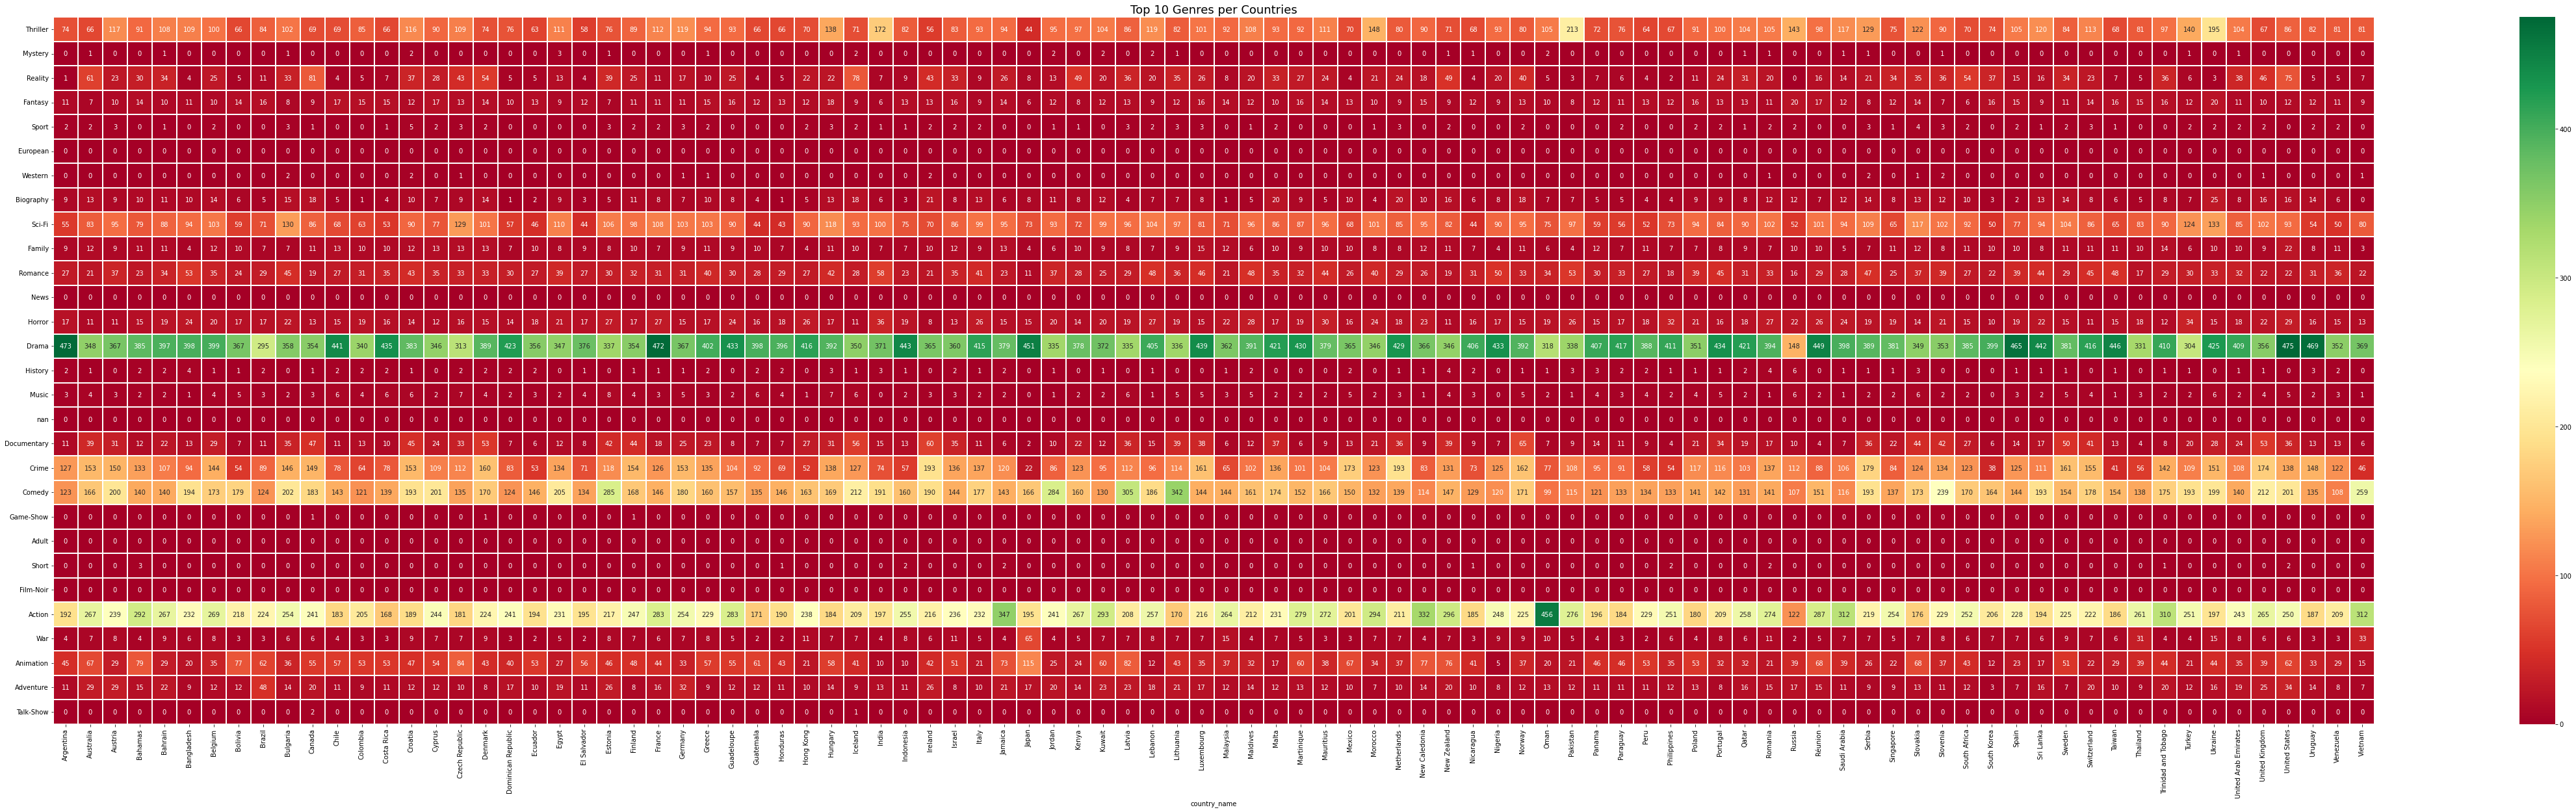

In [38]:
summary_countries = join_countries[["country_name"] + arr_genre]
summary_countries = summary_countries[arr_genre].groupby(summary_countries["country_name"]).sum()
summary_countries = summary_countries.transpose()

# Create heatmap
count = np.asarray(summary_countries)

# Define the plot
fig, ax = plt.subplots(figsize=(80,20))

# Add title to the Heat map
title = "Top 10 Genres per Countries"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])


# Use the heatmap function from the seaborn package
sns.heatmap(summary_countries,fmt="",annot=count,cmap='RdYlGn',linewidths=0.25,ax=ax)

# Display the Pharma Sector Heatmap
plt.savefig("genre_heatmap.png")
plt.show()

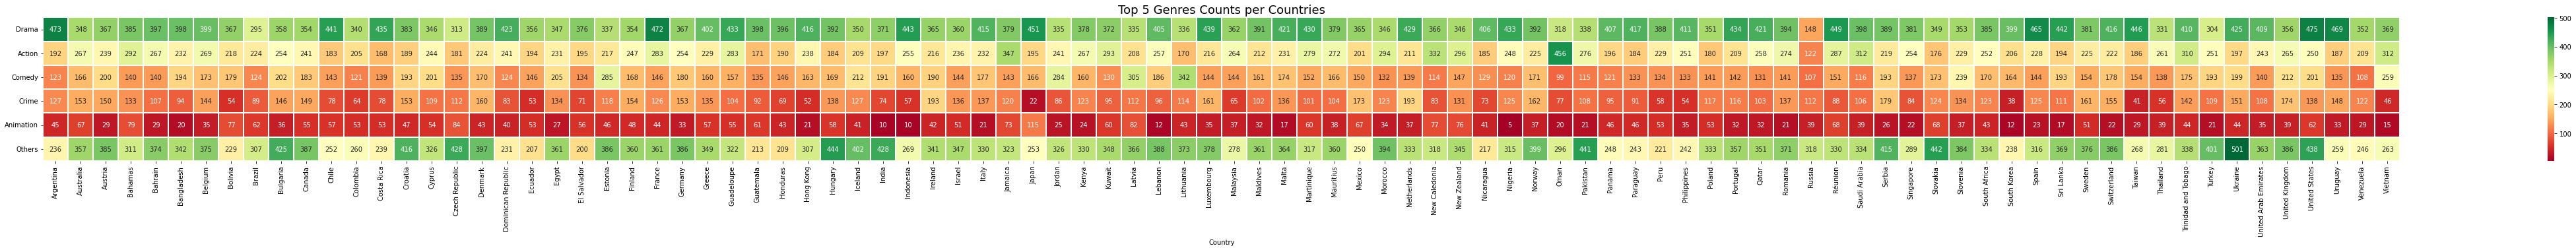

In [39]:
# Top 5 genres
summary_countries = join_countries[["country_name"] + arr_genre]
summary_countries = summary_countries[arr_genre].groupby(summary_countries["country_name"]).sum()
top5 = ["Drama","Action","Comedy","Crime","Animation"]

# Create 'others' category
s_top5 = set(top5)
others = [x for x in all_genre if x not in s_top5]

# Slice DataFrame
top5_countries = summary_countries[top5]

# Add 'others'
top5_countries['Others'] = summary_countries[others].transpose().sum()
top5_countries = top5_countries.transpose()
top5_countries

# Create heatmap
count = np.asarray(top5_countries)

# Define the plot
fig, ax = plt.subplots(figsize=(80,4))

# Add title to the Heat map
title = "Top 5 Genres Counts per Countries"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Use the heatmap function from the seaborn package
sns.heatmap(top5_countries,fmt="",annot=count,cmap='RdYlGn',linewidths=0.25,ax=ax)
ax.set_xlabel("Country")

# Display the Pharma Sector Heatmap
plt.savefig("genre_heatmap_top5.png")
plt.show()

In [ ]:
# Top 5 genres
summary_countries = join_countries[["country_name"] + arr_genre]
summary_countries = summary_countries[arr_genre].groupby(summary_countries["country_name"]).sum()
top5 = ["Drama","Action","Comedy","Crime","Animation"]

# Create 'others' category
s_top5 = set(top5)
others = [x for x in all_genre if x not in s_top5]

# Slice DataFrame
top5_countries = summary_countries[top5]

# Add 'others'
top5_countries['Others'] = summary_countries[others].transpose().sum()
top5_countries

# Create heatmap
count = np.asarray(top5_countries)

# Define the plot
fig, ax = plt.subplots(figsize=(8,80))

# Add title to the Heat map
title = "Top 5 Genres Counts per Countries"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Use the heatmap function from the seaborn package
sns.heatmap(top5_countries,fmt="",annot=count,cmap='RdYlGn',linewidths=0.25,ax=ax)
ax.set_ylabel("Country")
ax.set_xlabel("Genres")

# Display the Pharma Sector Heatmap
plt.savefig("genre_heatmap_top5_vertical.png")
plt.show()

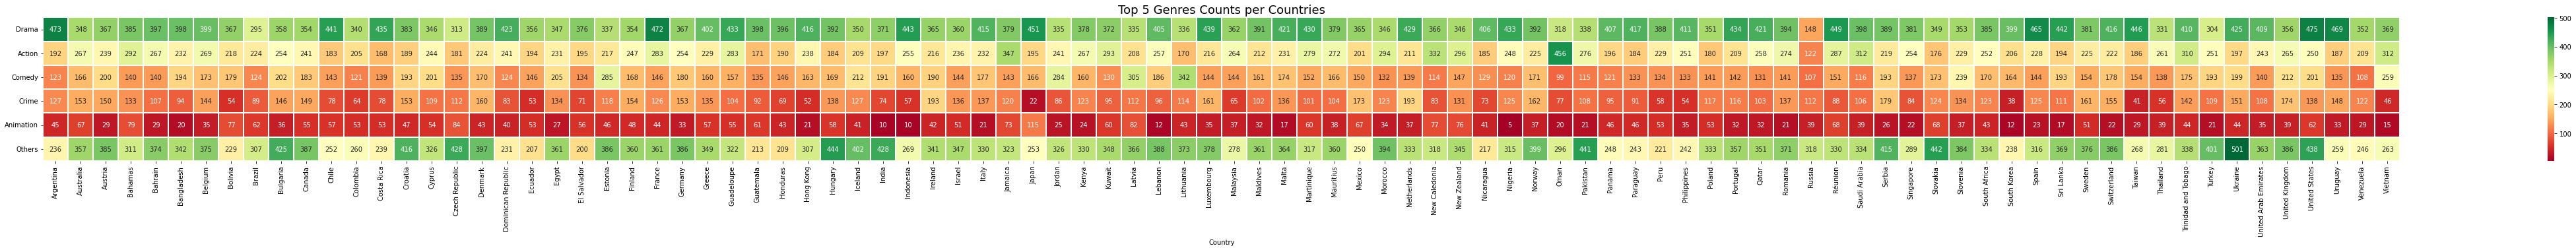

In [40]:
# Top 5 genres
summary_countries = join_countries[["country_name"] + arr_genre]
summary_countries = summary_countries[arr_genre].groupby(summary_countries["country_name"]).sum()
top5 = ["Drama","Action","Comedy","Crime","Animation"]

# Create 'others' category
s_top5 = set(top5)
others = [x for x in all_genre if x not in s_top5]

# Slice DataFrame
top5_countries = summary_countries[top5]

# Add 'others'
top5_countries['Others'] = summary_countries[others].transpose().sum()
top5_countries = top5_countries.transpose()
top5_countries

# Create heatmap
count = np.asarray(top5_countries)

# Define the plot
fig, ax = plt.subplots(figsize=(80,4))

# Add title to the Heat map
title = "Top 5 Genres Counts per Countries"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Use the heatmap function from the seaborn package
sns.heatmap(top5_countries,fmt="",annot=count,cmap='RdYlGn',linewidths=0.25,ax=ax)
ax.set_xlabel("Country")

# Display the Pharma Sector Heatmap
plt.savefig("genre_heatmap_top5.png")
plt.show()

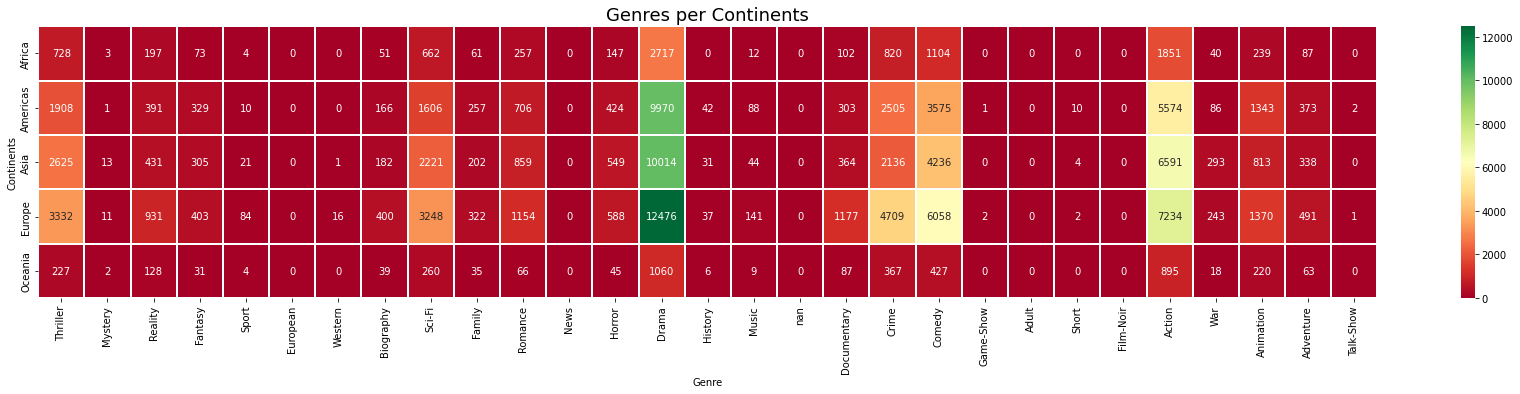

In [41]:
summary_countries = join_countries[["country_name"] + arr_genre]
summary_countries = summary_countries.merge(continents, how="left", left_on="country_name", right_on="country")
summary_continents = summary_countries[arr_genre].groupby(summary_countries["continent"]).sum()
# summary_continents = summary_continents.transpose()
summary_continents
# Create heatmap
count = np.asarray(summary_continents)

# Define the plot
fig, ax = plt.subplots(figsize=(30,5))

# Add title to the Heat map
title = "Genres per Continents"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Use the heatmap function from the seaborn package
sns.heatmap(summary_continents,fmt="",annot=count,cmap='RdYlGn',linewidths=0.25,ax=ax)

# Set labels
ax.set_xlabel("Genre")
ax.set_ylabel("Continents")

# Display the Pharma Sector Heatmap
plt.savefig("genre_heatmap_continents.png")
plt.show()

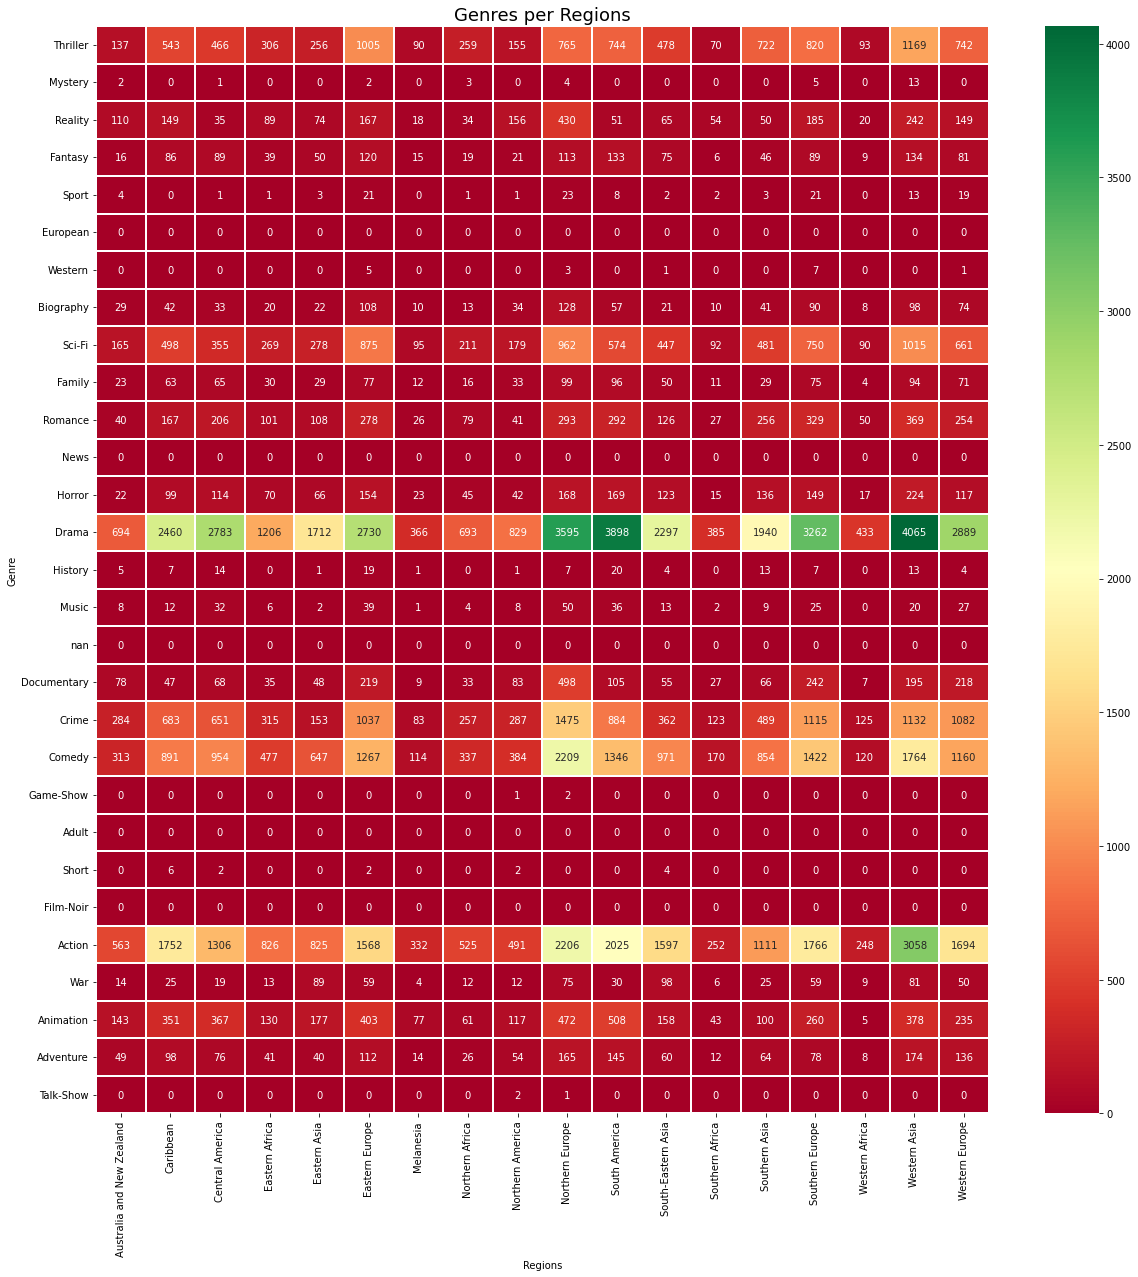

In [57]:
summary_countries = join_countries[["country_name"] + arr_genre]
summary_countries = summary_countries.merge(continents, how="left", left_on="country_name", right_on="country")
summary_regions = summary_countries[arr_genre].groupby(summary_countries["sub_region"]).sum()
summary_regions = summary_regions.transpose()
summary_regions
# Create heatmap
count = np.asarray(summary_regions)

# Define the plot
fig, ax = plt.subplots(figsize=(20,20))

# Add title to the Heat map
title = "Genres per Regions"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Use the heatmap function from the seaborn package
sns.heatmap(summary_regions,fmt="",annot=count,cmap='RdYlGn',linewidths=0.25,ax=ax)

# Set labels
ax.set_xlabel("Regions")
ax.set_ylabel("Genre")

# Display the Pharma Sector Heatmap
plt.savefig("genre_heatmap_regions.png")
plt.show()

Genre action dan drama mendominasi top 10 movies and TV shows sepanjang 2 tahun di hampir setiap negara, kecuali di Rusia, perbandingan jumlah drama sangat sedikit. Genre Comedy, Crime, dan Animation menyusul sebagai top 5 genre yang mendominasi.

Lithuania, Jordan, Lativia, dan Estonia memiliki genre comedy yang mendominasi top 10.

## Trend Top 5 genre

In [ ]:
arr_genre_5 = ['Drama','Action','Comedy','Crime','Animation']
weekly_countries = join_countries[["week"] + arr_genre_5]
weekly_countries['month'] = weekly_countries['week'].str.slice(start=0, stop=7)
weekly_countries.drop(columns='week', inplace=True)
weekly_countries = weekly_countries.groupby("month").sum()


# # Define the plot
fig, ax = plt.subplots(figsize=(15,8))
ax.set_facecolor("black")
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Add title to the Heat map
title = "Monthly Genre Trend in Top 10 Countries"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])


# Use the heatmap function from the seaborn package
sns.lineplot(data=weekly_countries)

# Display the Pharma Sector Heatmap
plt.figure(facecolor='black')
plt.show()

In [ ]:
import matplotlib as mpl

c

arr_genre_5 = ['Drama','Action','Comedy','Crime','Animation']
weekly_global = join_global[["week"] + arr_genre_5]
weekly_global['month'] = weekly_global['week'].str.slice(start=0, stop=7)
weekly_global.drop(columns='week', inplace=True)
weekly_global = weekly_global.groupby("month").sum()


# # Define the plot
fig, ax = plt.subplots(figsize=(15,8))
ax.set_facecolor("black")
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Add title to the Heat map
title = "Monthly Genre Trend in Top 10 Global"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])


# Use the heatmap function from the seaborn package
sns.lineplot(data=weekly_global)

# Display the Pharma Sector Heatmap
plt.figure(facecolor='black')
plt.show()

In [ ]:
summary_countries = join_countries[["country_name","week"] + arr_genre]
summary_countries = summary_countries[arr_genre].groupby(summary_countries["country_name"]).sum()
summary_countries = summary_countries.transpose()

# Create heatmap
count = np.asarray(summary_countries)

# Define the plot
fig, ax = plt.subplots(figsize=(15,8))

# Add title to the Heat map
title = "Top 10 Genres per Countries"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])


# Use the heatmap function from the seaborn package
sns.heatmap(summary_countries,fmt="",annot=count,cmap='RdYlGn',linewidths=0.25,ax=ax)

# Display the Pharma Sector Heatmap
plt.show()

In [ ]:
# Ambil data bulan Mei 2022
may_global = all_global[all_global['week'].str.startswith('2022-05', na=False)]
may_global = may_global[["week","category","weekly_rank","show_title"]]

In [ ]:
m = may_global.groupby(by="weekly_rank")

In [ ]:
(all_genre)

may_global

In [ ]:
may_global

In [ ]:
sept_countries = countries[countries['week'].str.startswith('2022-09-04', na=False)]
sept_countries.value_counts('show_title')

In [ ]:
sept_countries

In [ ]:
join_most

In [ ]:
summary_most = join_most[["category"] + arr_genre]
summary_most = summary_most[arr_genre].groupby(summary_most["category"]).sum()
summary_most = summary_most.transpose()

# Create heatmap
count = np.asarray(summary_most)

# Define the plot
fig, ax = plt.subplots(figsize=(10,10))

# Add title to the Heat map
title = "Genres in Top 10 All Time per Category"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])


# Use the heatmap function from the seaborn package
sns.heatmap(summary_most,fmt="",annot=count,cmap='RdYlGn',linewidths=0.30,ax=ax)

# Display the Pharma Sector Heatmap
plt.show()

In [ ]:
summary_most = join_global[["category"] + arr_genre]
summary_most = summary_most[arr_genre].groupby(summary_most["category"]).sum()
summary_most = summary_most.transpose()

# Create heatmap
count = np.asarray(summary_most)

# Define the plot
fig, ax = plt.subplots(figsize=(10,10))

# Add title to the Heat map
title = "Genres in Top 10 Global per Category"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])


# Use the heatmap function from the seaborn package
sns.heatmap(summary_most,fmt="",annot=count,cmap='RdYlGn',linewidths=0.30,ax=ax)

# Display the Heatmap
plt.show()

In [ ]:
summary_most = join_global[["Runtime"] + arr_genre]
summary_most = summary_most[arr_genre].groupby(summary_most["Runtime"]).sum()
summary_most = summary_most.transpose()

# Create heatmap
count = np.asarray(summary_most)

# Define the plot
fig, ax = plt.subplots(figsize=(10,10))

# Add title to the Heat map
title = "Genres in Top 10 Global per Runtime"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])


# Use the heatmap function from the seaborn package
sns.heatmap(summary_most,fmt="",annot=count,cmap='RdYlGn',linewidths=0.30,ax=ax)

# Display the Heatmap
plt.show()

## Trend top 5 movie

In [53]:
join_countries.value_counts("Title")

Title
Stranger Things           6486
Bridgerton                2064
You                       1900
Manifest                  1890
The Witcher               1784
                          ... 
Casino                       1
Intersection                 1
The 40-Year-Old Virgin       1
Infamous                     1
Straight Outta Compton       1
Length: 2137, dtype: int64

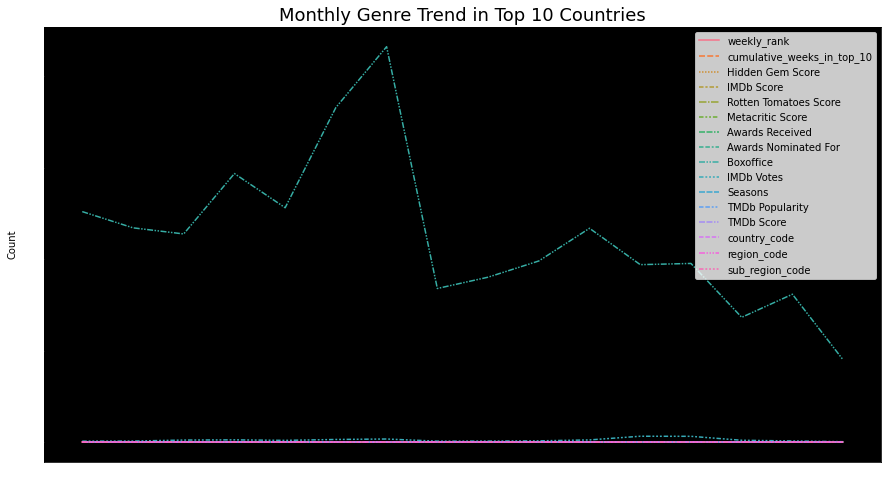

<Figure size 432x288 with 0 Axes>

In [56]:
# arr_genre_5 = ['Drama','Action','Comedy','Crime','Animation']
# weekly_countries = join_countries[["week"] + arr_genre_5]
join_countries['month'] = join_countries['week'].str.slice(start=0, stop=7)
join_countries.drop(columns='week', inplace=True)
monthly_countries = 
monthly_countries = monthly_countries.groupby("month").sum()


# # Define the plot
fig, ax = plt.subplots(figsize=(15,8))
ax.set_facecolor("black")
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Add title to the Heat map
title = "Monthly Genre Trend in Top 10 Countries"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])


# Use the heatmap function from the seaborn package
sns.lineplot(data=monthly_countries)

# Display the Pharma Sector Heatmap
plt.figure(facecolor='black')
plt.show()

## Hidden Gem Score Average per Director

In [ ]:
netflix[['Director','Hidden Gem Score','IMDb Score','Rotten Tomatoes Score']].groupby('Director').mean().sort_values('Hidden Gem Score',ascending=False).dropna()

In [ ]:
netflix[netflix['Director'] == "Fred Savage"]

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in join_countries.show_title:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='black',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
ax = plt.axes()
ax.set_facecolor("black")

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.figure(facecolor='black')

plt.show()

## Comedy Countries

In [42]:
# Comedy countries
summary_countries = join_countries[["country_name"] + arr_genre]
summary_countries = summary_countries[arr_genre].groupby(summary_countries["country_name"]).sum()
summary_countries = summary_countries.transpose()
comedy = ["Estonia","Jordan","Latvia","Lithuania"]
comedy_countries = summary_countries[comedy]
other_countries = summary_countries['']
comedy_countries
# Create heatmap
count = np.asarray(comedy_countries)

# Define the plot
fig, ax = plt.subplots(figsize=(8,20))

# Add title to the Heat map
title = "Top 10 Genres per Countries"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18, )
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Set title


# Use the heatmap function from the seaborn package
sns.heatmap(comedy_countries,fmt="",annot=count,cmap='RdYlGn',linewidths=0.25,ax=ax)

# Display the Pharma Sector Heatmap
plt.savefig("genre_heatmap_comedy.png")
plt.show()

KeyError: ''

In [46]:
comedy = ["Estonia","Jordan","Latvia","Lithuania"]
comedy_countries_info = join_countries[join_countries['country_name'].isin(comedy)]

In [47]:
comedy_countries_info.value_counts("Title")

Title
Stranger Things      380
Friends              303
The Office (U.S.)    156
Manifest             104
Bridgerton            90
                    ... 
Shrek the Third        1
Silver Skates          1
Sooryavanshi           1
Soulmate               1
Noah                   1
Length: 505, dtype: int64

In [48]:
top5_film_comedy = ['Friends', 'Stranger Things', 'The Office (U.S.)', 'New Amsterdam', 'Bridgerton']
netflix[netflix['Title'].isin(top5_film_comedy)]

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,ID,Description,Age Certification,Production Countries,Seasons,IMDb ID,TMDb Popularity,TMDb Score,Thriller,Mystery,Reality,Fantasy,Sport,European,Western,Biography,Sci-Fi,Family,Romance,News,Horror,Drama,History,Music,nan,Documentary,Crime,Comedy,Game-Show,Adult,Short,Film-Noir,Action,War,Animation,Adventure,Talk-Show,Polish,Scanian,Basque,Akan,Ancient (to 1453),Nahuatl,Slovak,Dutch,Malay,French Sign Language,Georgian,Dinka,Mende,Manipuri,Hindi,Tatar,Aboriginal,Afrikaans,Min Nan,Serbian,Hokkien,Estonian,Marathi,Dari,Kriolu,Haitian,Cornish,Maltese,Filipino,Old English,Occitan,Gujarati,Japanese Sign Language,Sindarin,Turkmen,Inuktitut,Central American Indian languages,Slovenian,Sioux,Lingala,Sinhalese,Mixtec,Kannada,Romanian,Acholi,Southern Sotho,Telugu,Saami,Albanian,Hungarian,Neapolitan,Amharic,Welsh,Awadhi,Russian,Punjabi,Nyanja,Spanish,Kinyarwanda,Apache languages,Lithuanian,Maya,Aramaic,Arabic,French,Yiddish,Kazakh,Tswana,Scots,Swiss German,Wayuu,Korean Sign Language,Somali,Swahili,Egyptian (Ancient),Breton,Quenya,Nepali,Sign Languages,Tarahumara,Malayalam,Tupi,Shanghainese,Ibo,Romany,German,Hawaiian,East-Greenlandic,Greenlandic,Persian,Zulu,Irish,Bhojpuri,Danish,Assamese,Scottish Gaelic,Thai,Greek,Spanish Sign Language,Flemish,Lao,Burmese,Nama,Old,Syriac,Croatian,Norwegian,Belarusian,Sicilian,Navajo,Polynesian,Tajik,Aragonese,Xhosa,Pawnee,American Sign Language,Portuguese,Finnish,Japanese,Algonquin,Cree,Tamil,Sranan,Fulah,Hakka,Swedish,Tulu,Mandarin,Bengali,Malinka,Klingon,Latin,None,Hausa,Vietnamese,Uzbek,Azerbaijani,Italian,Ukrainian,Tagalog,Hebrew,English,Quechua,Indonesian,Khmer,Chinese,Papiamento,Mohawk,Pushto,Mapudungun,Korean,Esperanto,Cheyenne,Tibetan,Icelandic,Kikuyu,Brazilian Sign Language,Shoshoni,Bable,North American Indian,Bulgarian,Cantonese,Catalan,Yoruba,Bosnian,Serbo-Croatian,Latvian,Kurdish,Turkish,Sanskrit,Czech,Urdu,Tok Pisin,Mongolian,Berber languages,Norse,Uighur,Luxembourgish,Chechen,Gallegan,Maori,Wolof,Armenian,Hmong
106,New Amsterdam,Drama,"TV Dramas,US TV Shows,TV Shows Based on Books,...",English,Series,4.0,"Poland,Italy,Spain,Czech Republic,Belgium,Port...",< 30 minutes,NaN,NaN,"Freema Agyeman, Janet Montgomery, Ryan Eggold,...",TV-14,8.1,NaN,NaN,3.0,NaN,NaN,2018-09-25 00:00:00,2021-02-15,NaN,https://www.netflix.com/watch/80241181,https://www.imdb.com/title/tt7817340,Americas oldest hospital welcomes a new maveri...,17422.0,https://occ-0-3911-1432.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNTQ0Nz...,https://www.youtube.com/watch?v=ZvMCbzrToAo,YouTube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Fals

In [49]:
comedy_countries_info[comedy_countries_info['country_name'] == "Estonia"].value_counts("Title")

Title
Stranger Things          96
The Office (U.S.)        44
Friends                  41
Manifest                 27
Better Call Saul         26
                         ..
Hype House                1
Hypnotic                  1
In Time                   1
The Last Airbender        1
No One Gets Out Alive     1
Length: 312, dtype: int64

In [50]:
comedy_countries_info[comedy_countries_info['country_name'] == "Jordan"].value_counts("Title")

Title
Friends                                      156
Stranger Things                               90
Manifest                                      29
You                                           24
Till Death                                    18
                                            ... 
The Contractor                                 1
The Bubble                                     1
The Boss Baby: Back in the Crib                1
Kingdom: Ashin of the North                    1
13 Hours: The Secret Soldiers of Benghazi      1
Length: 330, dtype: int64

In [51]:
comedy_countries_info[comedy_countries_info['country_name'] == "Latvia"].value_counts("Title") 

Title
Stranger Things                98
Friends                        53
The Office (U.S.)              37
Manifest                       27
Bridgerton                     26
                               ..
Jack Reacher                    1
Jack Reacher: Never Go Back     1
Jackass 3                       1
The Invisible Man               1
Nightbooks                      1
Length: 318, dtype: int64

In [52]:
comedy_countries_info[comedy_countries_info['country_name'] == "Lithuania"].value_counts("Title") 

Title
Stranger Things              96
The Office (U.S.)            75
Friends                      53
Bridgerton                   26
Sex Education                26
                             ..
The Snowman                   1
Metal Lords                   1
The Silent Sea                1
The Seven Deadly Sins         1
1000 Miles from Christmas     1
Length: 302, dtype: int64